In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D

In [6]:
!tar xvzf minc-2500.tar.gz

Streaming output truncated to the last 5000 lines.
minc-2500/images/paper/paper_002110.jpg
minc-2500/images/paper/paper_002012.jpg
minc-2500/images/paper/paper_002348.jpg
minc-2500/images/paper/paper_000073.jpg
minc-2500/images/paper/paper_001838.jpg
minc-2500/images/paper/paper_000120.jpg
minc-2500/images/paper/paper_001723.jpg
minc-2500/images/paper/paper_001114.jpg
minc-2500/images/paper/paper_000330.jpg
minc-2500/images/paper/paper_001161.jpg
minc-2500/images/paper/paper_002237.jpg
minc-2500/images/paper/paper_000870.jpg
minc-2500/images/paper/paper_001604.jpg
minc-2500/images/paper/paper_000450.jpg
minc-2500/images/paper/paper_000150.jpg
minc-2500/images/paper/paper_001191.jpg
minc-2500/images/paper/paper_001177.jpg
minc-2500/images/paper/paper_001628.jpg
minc-2500/images/paper/paper_000489.jpg
minc-2500/images/paper/paper_002471.jpg
minc-2500/images/paper/paper_002283.jpg
minc-2500/images/paper/paper_000773.jpg
minc-2500/images/paper/paper_001953.jpg
minc-2500/images/paper/paper_

In [5]:
!wget http://opensurfaces.cs.cornell.edu/static/minc/minc-2500.tar.gz

--2020-06-28 13:26:14--  http://opensurfaces.cs.cornell.edu/static/minc/minc-2500.tar.gz
Resolving opensurfaces.cs.cornell.edu (opensurfaces.cs.cornell.edu)... 23.23.145.106
Connecting to opensurfaces.cs.cornell.edu (opensurfaces.cs.cornell.edu)|23.23.145.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2240609665 (2.1G) [application/octet-stream]
Saving to: ‘minc-2500.tar.gz’

minc-2500.tar.gz    100%[===================>]   2.09G  5.82MB/s    in 3m 47s  

2020-06-28 13:30:01 (9.41 MB/s) - ‘minc-2500.tar.gz’ saved [2240609665/2240609665]



In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
image = 

SyntaxError: ignored

In [ ]:
print(uploaded.keys())

In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [ ]:
Couch = ['Fabric', 'Leather','Valvet', 'Wood']
IMG_SIZE = 128

In [39]:
training_data = np.load('drive/My Drive/Final_data.npy', allow_pickle=True)

In [40]:
fabric=[]
leather=[]
valvet=[]
wood=[]
for i in training_data:
  if i[1] == 0:
    fabric.append(i)
    fabric.append([cv2.flip(i[0], 1), 0])
  elif i[1] == 1:
    leather.append(i)
    leather.append([cv2.flip(i[0], 1), 1])
  elif i[1] == 2:
    valvet.append(i)
    valvet.append([cv2.flip(i[0], 1), 2])
  elif i[1] == 3:
    wood.append(i)
    wood.append([cv2.flip(i[0], 1), 3])

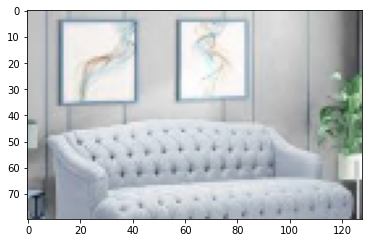

In [ ]:
plt.imshow(fabric[0][0])

In [ ]:
fabric[0][1]

0

In [ ]:
len(fabric)

4000

In [ ]:
len(leather)

4000

In [ ]:
len(valvet)

4000

In [ ]:
len(wood)

4000

In [41]:
random.shuffle(fabric)
random.shuffle(leather)
random.shuffle(valvet)
random.shuffle(wood)

In [ ]:
training_data = fabric[:3000] + leather[:3000] + valvet[:3000] + wood[:3000]

In [42]:
#test_data = fabric[3000:] + leather[3000:] + valvet[3000:] + wood[3000:]
#test_data = leather[3000:]
test_data = fabric[3000:] + leather[3000:] + wood[3000:]

In [43]:
X_test = []
y_test = []

for feature, label in test_data:
    X_test.append(feature)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
X_test = X_test/255.0

In [ ]:
random.shuffle(training_data)

In [ ]:
X_train = []
y_train = []

for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)

In [ ]:
len(X_train)

16000

In [ ]:
len(y_train)

16000

In [ ]:
X_train[0].shape

(128, 128, 3)

In [ ]:
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
y_train = np.array(y_train)

In [ ]:
len(X_train)

12000

In [ ]:
X_train = X_train/255.0

In [ ]:
model = Sequential()

# First Layer
model.add(   Conv2D(64,  (3, 3), input_shape = X_train.shape[1:])   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

# Second Layer
model.add(   Conv2D(128,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

model.add(   Conv2D(256,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

model.add(   Conv2D(128,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

model.add(Flatten())
model.add(Dense(64))
model.add( Activation('relu') )

model.add(Flatten())
model.add(Dense(32))
model.add( Activation('relu') )

# Output Layer
model.add(Dense(4))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'RMSprop',
             metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs=10)

Epoch 1/10
375/375 [==============================] - 27s 73ms/step - loss: 1.0069 - accuracy: 0.5738
Epoch 2/10
375/375 [==============================] - 27s 73ms/step - loss: 0.6572 - accuracy: 0.7435
Epoch 3/10
375/375 [==============================] - 27s 73ms/step - loss: 0.5253 - accuracy: 0.7980
Epoch 4/10
375/375 [==============================] - 27s 73ms/step - loss: 0.4304 - accuracy: 0.8349
Epoch 5/10
375/375 [==============================] - 27s 73ms/step - loss: 0.3379 - accuracy: 0.8744
Epoch 6/10
375/375 [==============================] - 28s 73ms/step - loss: 0.2814 - accuracy: 0.8980
Epoch 7/10
375/375 [==============================] - 28s 73ms/step - loss: 0.2397 - accuracy: 0.9178
Epoch 8/10
375/375 [==============================] - 27s 73ms/step - loss: 0.2071 - accuracy: 0.9322
Epoch 9/10
375/375 [==============================] - 27s 73ms/step - loss: 0.1884 - accuracy: 0.9396
Epoch 10/10
375/375 [==============================] - 27s 73ms/step - loss: 0.170

In [44]:
_, accu = model.evaluate(X_test, y_test)
print(accu*100)

94/94 [==============================] - 1s 10ms/step - loss: 6.9381 - accuracy: 0.4270
42.69999861717224


In [ ]:
model.save("couch_model.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: couch_model.model/assets


Couch -  fabric


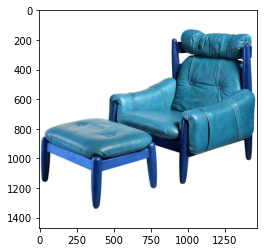

In [28]:
image = cv2.imread('0aaccf0950e76fe756ffad596f3b95c6.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  wood


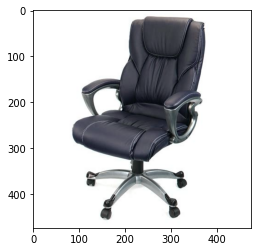

In [29]:
image = cv2.imread('idosioids.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  wood


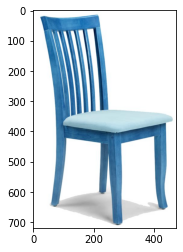

In [30]:
image = cv2.imread('iosid.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  leather


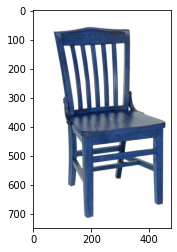

In [31]:
image = cv2.imread('wood.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  wood


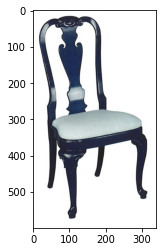

In [32]:
image = cv2.imread('00000077.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  fabric


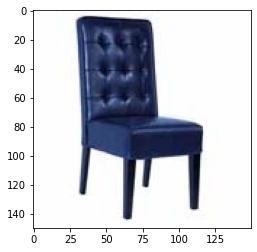

In [33]:
image = cv2.imread('00000200.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  wood


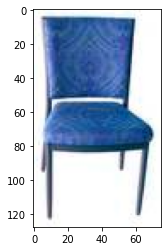

In [34]:
image = cv2.imread('00000335.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  fabric


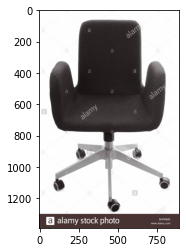

In [35]:
image = cv2.imread('BHPMM0.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  leather


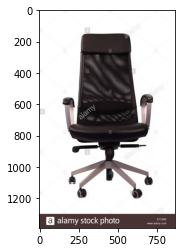

In [36]:
image = cv2.imread('E715R6.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  fabric


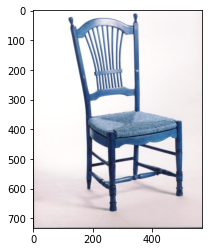

In [37]:
image = cv2.imread('00000058.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  fabric


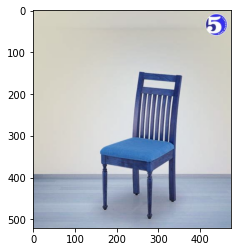

In [38]:
image = cv2.imread('try.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

Couch -  fabric


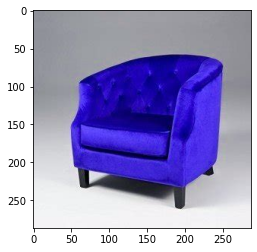

In [39]:
image = cv2.imread('valvet_1.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

In [ ]:
files.download('/content/couch_model.model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save('drive/My Drive/Final_couch_model.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: drive/My Drive/Final_couch_model.model/assets


In [ ]:
model = tf.keras.models.load_model('/content/couch_model_good.model')

Couch -  Valvet


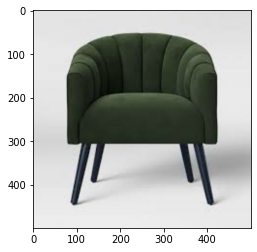

In [ ]:
image = cv2.imread('velvet_0060.jpg')
plt.imshow(image)
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
image = image.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
couch_prediction = model.predict(image)

print("Couch - ", Couch[couch_prediction[0].argmax()])

In [2]:
Couch = ['fabric', 'leather', 'wood']
IMG_SIZE = 128

In [3]:
training_data = []
fabric = []
leather = []
wood = []
for i in os.listdir('minc-2500/images/fabric'):
  img = cv2.imread(os.path.join('minc-2500/images/fabric', i))
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  fabric.append([img, 0])
  fabric.append([cv2.flip(img, 1), 0])

for i in os.listdir('minc-2500/images/leather'):
  img = cv2.imread(os.path.join('minc-2500/images/leather', i))
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  leather.append([img, 1])
  leather.append([cv2.flip(img, 1), 1])

for i in os.listdir('minc-2500/images/wood'):
  img = cv2.imread(os.path.join('minc-2500/images/wood', i))
  img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
  wood.append([img, 2])
  wood.append([cv2.flip(img, 1), 2])

In [4]:
random.shuffle(fabric)
random.shuffle(leather)
random.shuffle(wood)

In [5]:
training_data = fabric[:3000] + leather[:3000] + wood[:3000]
random.shuffle(training_data)
del fabric
del leather
del wood

In [6]:
X_train = []
y_train = []

for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)

In [7]:
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [8]:
y_train = np.array(y_train)

In [9]:
X_train = X_train/255.0

In [10]:
model = Sequential()

# First Layer
model.add(   Conv2D(64,  (3, 3), input_shape = X_train.shape[1:])   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

# Second Layer
model.add(   Conv2D(128,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

model.add(   Conv2D(256,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

model.add(   Conv2D(128,  (3, 3))   )
model.add( Activation('relu') )
model.add( MaxPool2D(pool_size = (2,2)) )

model.add(Flatten())
model.add(Dense(64))
model.add( Activation('relu') )

model.add(Flatten())
model.add(Dense(32))
model.add( Activation('relu') )

# Output Layer
model.add(Dense(4))
model.add(Activation('sigmoid'))

In [11]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'RMSprop',
             metrics = ['accuracy'])

In [27]:
model.fit(X_train, y_train, batch_size = 32, epochs=10)

Epoch 1/10
282/282 [==============================] - 6s 22ms/step - loss: 0.2669 - accuracy: 0.9032
Epoch 2/10
282/282 [==============================] - 6s 21ms/step - loss: 0.2547 - accuracy: 0.9107
Epoch 3/10
282/282 [==============================] - 6s 21ms/step - loss: 0.2388 - accuracy: 0.9122
Epoch 4/10
282/282 [==============================] - 6s 21ms/step - loss: 0.2347 - accuracy: 0.9189
Epoch 5/10
282/282 [==============================] - 6s 21ms/step - loss: 0.2272 - accuracy: 0.9234
Epoch 6/10
282/282 [==============================] - 6s 21ms/step - loss: 0.2147 - accuracy: 0.9288
Epoch 7/10
282/282 [==============================] - 6s 21ms/step - loss: 0.2200 - accuracy: 0.9330
Epoch 8/10
282/282 [==============================] - 6s 21ms/step - loss: 0.1727 - accuracy: 0.9407
Epoch 9/10
282/282 [==============================] - 6s 21ms/step - loss: 0.1999 - accuracy: 0.9398
Epoch 10/10
282/282 [==============================] - 6s 21ms/step - loss: 0.1882 - accura

In [14]:
model.save("couch_model.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: couch_model.model/assets
